In [ ]:
##### alignment two training dynamic process based on model's RDMs


In [1]:
import sys
import torch
import os
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

CLEAN_PATH = "/home/yifan/dataset/clean_ref/pairflip/cifar10/0"
import sys
sys.path.append(REF_PATH)
from config import config
TRAINING_PARAMETER = config["TRAINING"]
NET = TRAINING_PARAMETER["NET"]
GPU_ID = config["GPU"]
DEVICE = torch.device("cuda:{}".format(GPU_ID) if torch.cuda.is_available() else "cpu")
import Model.model as subject_model
model = eval("subject_model.{}()".format(NET))

n_epoch = 200

ref_model_location = os.path.join(REF_PATH,'Model', "Epoch_{:d}".format(n_epoch), "subject_model.pth")
model.load_state_dict(torch.load(ref_model_location, map_location=torch.device("cpu")))
model = model.to(DEVICE)


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
ref_state_dict= torch.load("/home/yifan/dataset/clean/pairflip/cifar10/0/Model/Epoch_200/subject_model.pth")
state_dict= torch.load("/home/yifan/dataset/clean_ref/pairflip/cifar10/0/Model/Epoch_199/subject_model.pth")
X1 = ref_state_dict['fc.weight']
X2 = state_dict['fc.weight']
# print(state_dict.keys())

In [12]:
#### same_set representation CKA
import numpy as np
from sklearn.cross_decomposition import CCA
# 建立模型
X = X1.cpu().detach()
Y = X2.cpu().detach()
cca = CCA(n_components=1)
# 训练数据
cca.fit(X, Y)
# print(X)
X_train_r, Y_train_r = cca.transform(X, Y)
# print(X_train_r)
print('referece epoch 200 vs target epoch 200')
print(np.corrcoef(X_train_r[:, 0], Y_train_r[:, 0])[0, 1]) #输出相关系数

referece epoch 200 vs target epoch 200
1.0


In [17]:
import os
import sys
sys.path.append("..")
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
X = X1.cpu().detach()
Y = X2.cpu().detach()

print('Linear CKA, between X and Y: {}'.format(np_cka.linear_CKA(X, Y)))

Linear CKA, between X and Y: 0.9985000676704483


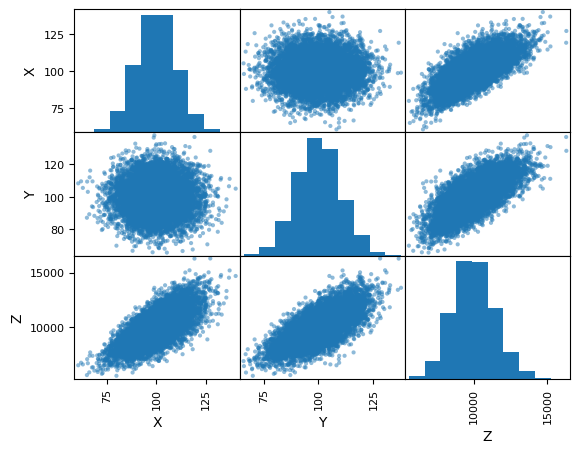

In [21]:
# 皮尔森相关系数
import random
import pandas as pd

n = 10000
X = [random.normalvariate(100, 10) for i in range(n)] # 随机生成服从均值100，标准差10的正态分布序列
Y = [random.normalvariate(100, 10) for i in range(n)] # 随机生成服从均值100，标准差10的正态分布序列
Z = [i*j for i,j in zip(X,Y)]
df = pd.DataFrame({"X":X,"Y":Y,"Z":Z})

import matplotlib.pyplot as plt 

# 绘制散点图矩阵
pd.plotting.scatter_matrix(df)
plt.show()
